In [6]:
from finance_utils.electrical.china.spot.discrete.probabilistic_forecast import DiscreteSpot,ProbabilisticDiscreteCurve
from finance_utils.electrical.china.spot.discrete.testback import TestBack,AnarchismRecycle, SampleRecycle
import numpy

In [7]:
from data_utils.stochastic_utils.distributions.baseclass import ABCDistribution
from data_utils.stochastic_utils.distributions.basic_distributions import NormalDistribution

In [8]:
dayahead = ProbabilisticDiscreteCurve([
    NormalDistribution(200, 9),
    NormalDistribution(201, 8),
    NormalDistribution(203, 7),
    NormalDistribution(102, 6),
])

realtime = ProbabilisticDiscreteCurve([
    NormalDistribution(250, 20),
    NormalDistribution(200, 21),
    NormalDistribution(200, 22),
    NormalDistribution(150, 53),
])

quantity = ProbabilisticDiscreteCurve([
    NormalDistribution(10, 1),
    NormalDistribution(9, 3),
    NormalDistribution(15, 1),
    NormalDistribution(25, 2),
])

spot = DiscreteSpot(dayahead, realtime, quantity)

In [9]:
from matplotlib import pyplot

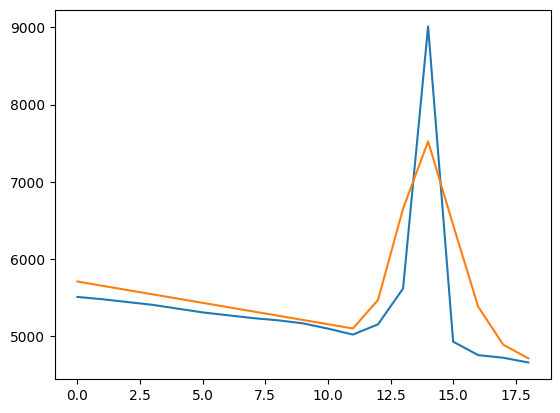

In [14]:
testback = TestBack(spot.random_sample(n=100, eps=50))
y = [
    numpy.median(
        testback.testback_yield([i] * 4, f=SampleRecycle, punishment_rate=0.5).yield_curve
    ) for i in range(1,20)
]
y_hat = [
    numpy.mean(
        testback.testback_yield([i] * 4, f=SampleRecycle, punishment_rate=0.5).yield_curve
    ) for i in range(1,20)
]
# y_control = [
#     numpy.mean(
#         testback.testback_yield(spot.quantity.value_list, f=SampleRecycle, punishment_rate=0.2).yield_curve
#     ) for i in range(1,20)
# ]
pyplot.plot(y)
pyplot.plot(y_hat)
# pyplot.plot(y_control)